# Digital Assignment 1
## Shivama
## 20BCE0535
---

### Question 1
### Write a program to demonstrate the working of the simple linear regression. Use an appropriate data set for building the best line fit and compute the Mean absolute error, mean squared error, root mean square, and R square value. 

In [195]:
import pandas as pd
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [2]:
df.shape

(30, 3)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [4]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [5]:
df.isna().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.corr()

,Unnamed: 0,YearsExperience,Salary
Unnamed: 0,1.000000,0.986460,0.960826
YearsExperience,0.986460,1.000000,0.978242
Salary,0.960826,0.978242,1.000000


<AxesSubplot:>

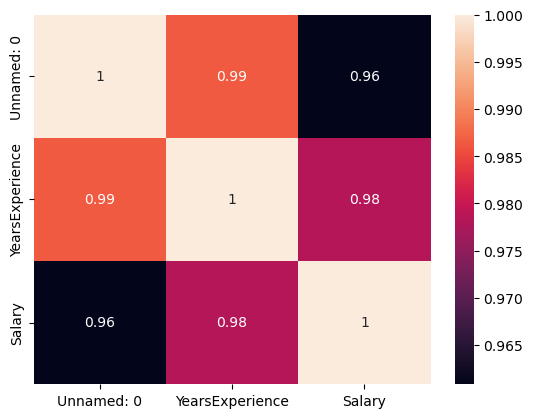

In [7]:
import seaborn as sns
sns.heatmap(df.corr(),annot = True)

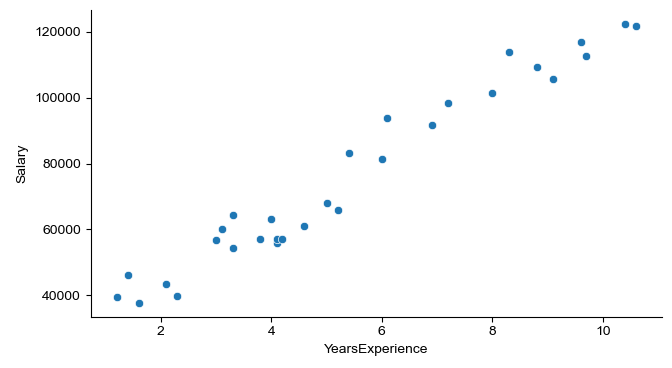

In [8]:
sns.relplot(x='YearsExperience',y='Salary',data=df,height = 3.8,aspect =1.8,kind='scatter' )
sns.set_style('dark')

In [11]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state =1)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 2)
(9, 2)
(21,)
(9,)


In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
regressor.coef_

array([1.2750022e-16, 1.0000000e+00])

In [16]:
regressor.intercept_

-8.881784197001252e-16

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

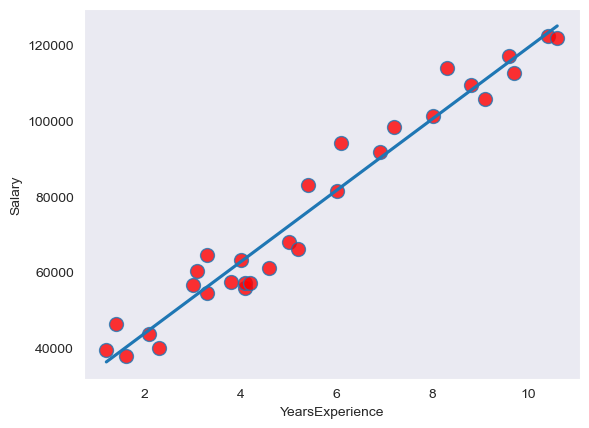

In [17]:
sns.regplot(x='YearsExperience',y='Salary',data=df,ci=None,scatter_kws={'s':100,'facecolor':'red'})

In [18]:
y_pred = regressor.predict(X_test)
y_pred

array([5.4, 7.2, 4. , 6.1, 4.6, 6.9, 9.6, 2.1, 8.8])

In [19]:
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
0,5.4,5.4
1,7.2,7.2
2,4.0,4.0
3,6.1,6.1
4,4.6,4.6
5,6.9,6.9
6,9.6,9.6
7,2.1,2.1
8,8.8,8.8


In [20]:
residuals = y_test-y_pred
residuals

array([-8.88178420e-16, -1.77635684e-15,  0.00000000e+00, -1.77635684e-15,
       -8.88178420e-16, -1.77635684e-15, -1.77635684e-15,  4.44089210e-16,
       -1.77635684e-15])

Text(0, 0.5, 'Predicted')

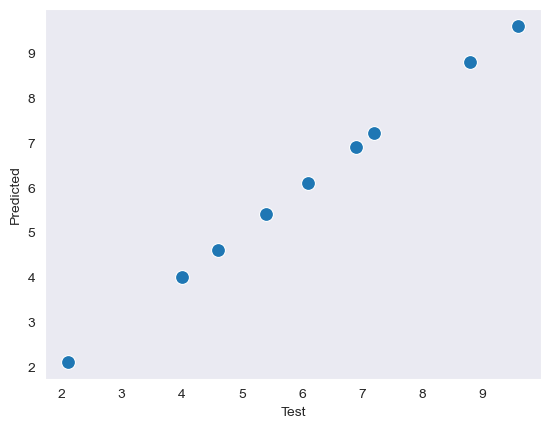

In [21]:
import matplotlib.pyplot as plt
sns.scatterplot(x=y_test,y=y_pred,ci=None,s=100)
plt.xlabel("Test")
plt.ylabel("Predicted")

In [22]:
from sklearn.metrics import mean_absolute_error
print('MAE:',mean_absolute_error(y_test,y_pred))

MAE: 1.2335811384723961e-15


In [23]:
from sklearn.metrics import mean_squared_error
print('MSE:',mean_squared_error(y_test,y_pred))

MSE: 1.9502394601297237e-30


In [24]:
import numpy as np
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  1.396509742225139e-15


## Question 2
### Implement a logistic regression algorithm and test the algorithm using any data set of your choice from the UCI repository. The output should include Accuracy, Error rate,Precision, and recall rate along with the confusion matrix.

In [235]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score
from sklearn.model_selection import train_test_split
import pandas as pd

In [271]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(url, header=None)

In [237]:
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

In [240]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [217]:
log_reg = LogisticRegression(max_iter=10000)
log_reg

LogisticRegression(max_iter=10000)

In [218]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [219]:
y_pred = log_reg.predict(X_test)

In [220]:
y_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B'], dtype=object)

In [221]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9473684210526315

In [222]:
error_rate = 1 - accuracy
error_rate

0.052631578947368474

In [223]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[62,  5],
       [ 1, 46]], dtype=int64)

In [224]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           B       0.98      0.93      0.95        67
           M       0.90      0.98      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [228]:
precision = precision_score(y_test, y_pred, pos_label="M")
recall = recall_score(y_test, y_pred, pos_label="M")

In [229]:
precision

0.9019607843137255

In [230]:
recall

0.9787234042553191

In [231]:
precision = precision_score(y_test, y_pred, pos_label="B")
recall = recall_score(y_test, y_pred, pos_label="B")

In [232]:
precision

0.9841269841269841

In [233]:
recall

0.9253731343283582

## Question 3
### Building a Classifier Using Decision Tree to predict the COVID-19 Severity. Print out the Accuracy, classification error, sensitivity, specificity, precision, and Confusion Matrix of Classification. 

In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

In [204]:
df = pd.read_csv('Cleaned-data.csv')
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [205]:
from sklearn.preprocessing import LabelEncoder
def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df


In [206]:
Encoder(df)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,0
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,0
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,0
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,0
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,5
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,5
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,5
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,5


In [212]:
X = df.drop(['Severity_Severe'], axis=1)
y = df[['Severity_Severe']]

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50,test_size = 0.25)

In [214]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [215]:
y_pred = clf.predict(X_test)

In [216]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train,y_pred = clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test,y_pred=y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  1.0


In [224]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming y_true is the true labels and y_pred is the predicted labels
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity and severity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
severity = 1 - specificity

print("Accuracy: {:.2f}".format(accuracy))
print("Error rate: {:.2f}".format(error_rate))
print("Precision: {:.2f}".format(precision))
print("Recall/Sensitivity: {:.2f}".format(recall))
print("Specificity: {:.2f}".format(specificity))
print("Severity: {:.2f}".format(severity))
print("Confusion Matrix:\n", cm)

Accuracy: 1.00
Error rate: 0.00
Precision: 1.00
Recall/Sensitivity: 1.00
Specificity: 1.00
Severity: 0.00
Confusion Matrix:
 [[59391     0]
 [    0 19809]]
